# <center>**Travel Insurance Prediction**
---
<center>Final Project Group 2 DS 30

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/sample_data/TravelInsurancePrediction.csv')
df.head()
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

# **EDA**

---
caranya adalah dengan program 
'code


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1249 non-null   int64 
 1   Employment Type      1249 non-null   object
 2   GraduateOrNot        1249 non-null   object
 3   AnnualIncome         1249 non-null   int64 
 4   FamilyMembers        1249 non-null   int64 
 5   ChronicDiseases      1249 non-null   int64 
 6   FrequentFlyer        1249 non-null   object
 7   EverTravelledAbroad  1249 non-null   object
 8   TravelInsurance      1249 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 97.6+ KB


In [ ]:
#pisahkan data numerik dan kategori untuk mencari nilai outlier
df["ChronicDiseases"]= df["ChronicDiseases"].map({0: "No", 1: "Yes"})
df["TravelInsurance"]= df["TravelInsurance"].map({0: "not purchased", 1: "purchased"})

cats = []
nums = []
for i in df.columns:
  if df[i].dtype=='object':
    cats.append(i)
  else:
    nums.append(i)
print('cats = ',cats)
print('nums = ',nums)

cats =  ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']
nums =  ['Age', 'AnnualIncome', 'FamilyMembers']


## Univariate

---

,Age,AnnualIncome,FamilyMembers
count,1249.000000,1.249000e+03,1249.000000
mean,29.755805,9.345476e+05,4.890312
std,2.921039,3.607293e+05,1.762313
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.200000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


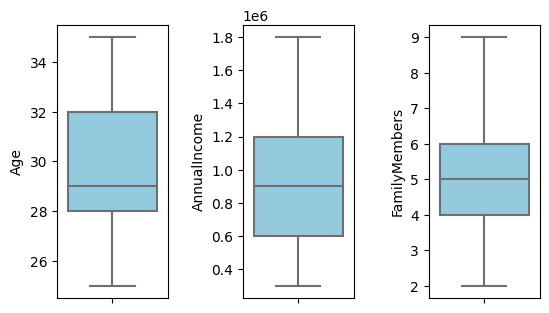

In [ ]:
#mengecek outlier
plt.figure(figsize=(20,12))
for i in range(0, len(nums)) :
  plt.subplot(4,11, i+2)
  sns.boxplot (y=df [nums[i]], color='skyblue', orient='v') 
plt.tight_layout ()
df.describe()

Imbalance percentage of Age: 0.00%
Imbalance percentage of AnnualIncome: 0.00%
Imbalance percentage of FamilyMembers: 0.00%


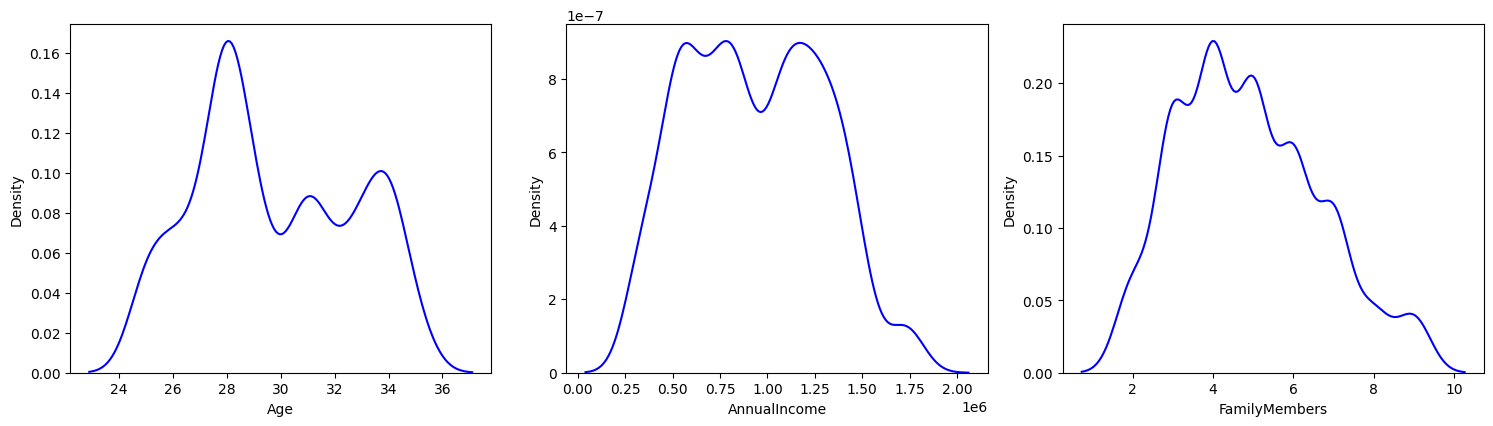

In [ ]:
features_num = nums
plt.figure(figsize=(20,8))
for i in range(0, len(nums)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x=df[nums[i]], color = 'blue')
  plt.tight_layout()

features = nums
for feature in features:
  max_value = df[feature].max()
  min_value = df[feature].min()
  range_value = max_value - min_value
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  count_outlier = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
  imbalance_percentage = (count_outlier / len(df)) * 100
  print(f"Imbalance percentage of {feature}: {imbalance_percentage:.2f}%")

1.   Hitung nilai maksimum dan minimum pada kolom feature menggunakan method max() dan min() dari Pandas.
2.   Hitung rentang nilai dengan mengurangi nilai maksimum dengan nilai minimum.
3.   Hitung quartile 1 (q1) dan quartile 3 (q3) dari kolom feature menggunakan method quantile() dari Pandas.
4.   Hitung interquartile range (IQR) dengan mengurangi q3 dengan q1.
5.   Hitung batas bawah (lower_bound) dan batas atas (upper_bound) untuk menentukan outlier dengan menggunakan rumus IQR x 1.5.
6.   Hitung jumlah outlier dengan menghitung nilai yang kurang dari lower_bound atau lebih besar dari upper_bound.
7.   Hitung presentasi ketimpangan dengan membagi jumlah outlier dengan total jumlah data dan dikalikan dengan 100.

Dalam program ini, presentasi ketimpangan pada beberapa feature numerik dihitung secara terpisah untuk setiap fitur dalam list features. Semakin besar presentasi ketimpangan, semakin tidak seimbang distribusi data pada kolom feature.

Imbalance percentage of Employment Type: 70.14%
Imbalance percentage of GraduateOrNot: 83.83%
Imbalance percentage of ChronicDiseases: 66.69%
Imbalance percentage of FrequentFlyer: 76.38%
Imbalance percentage of EverTravelledAbroad: 80.46%
Imbalance percentage of TravelInsurance: 61.33%


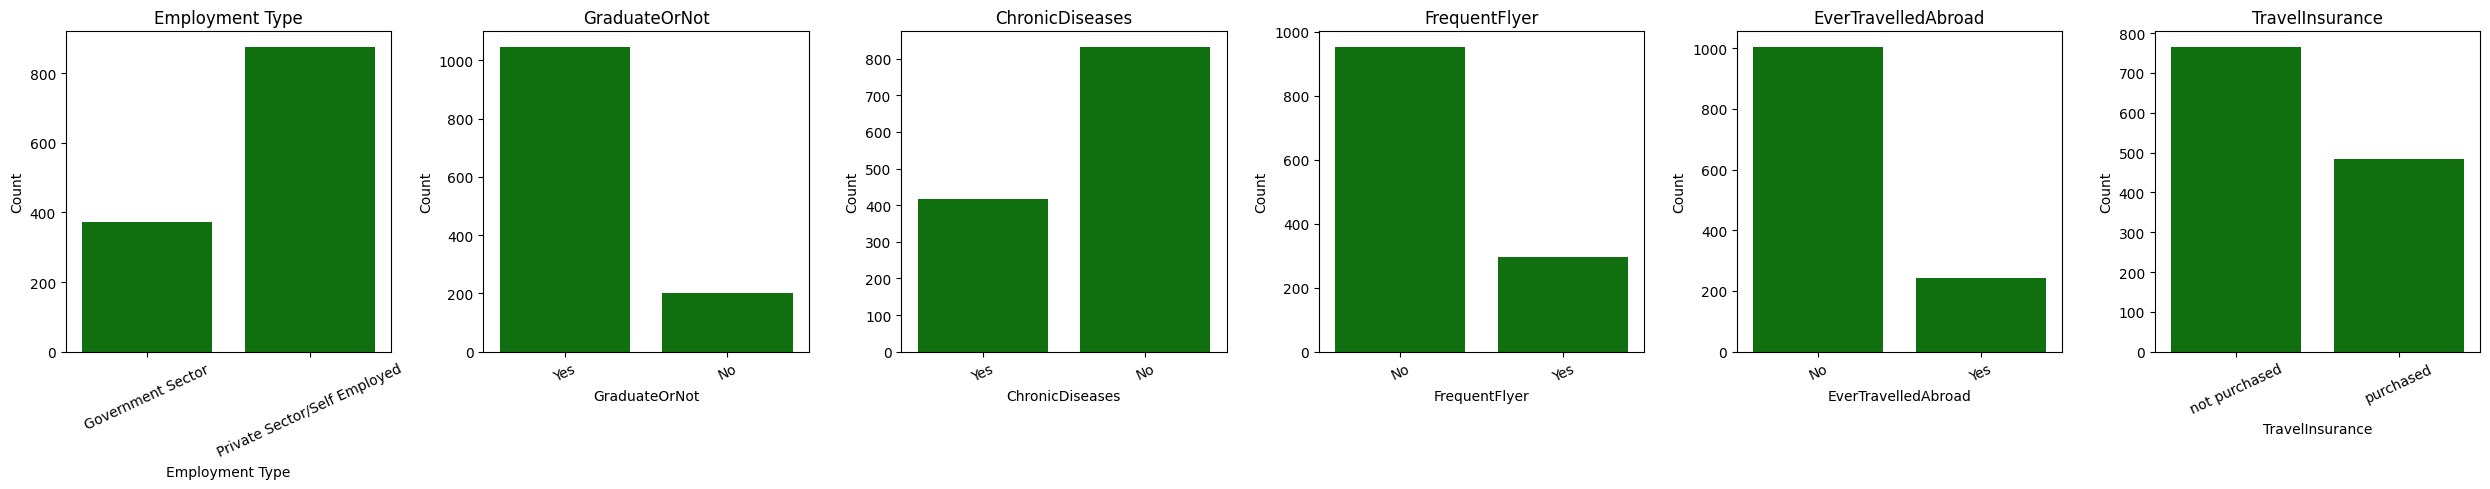

In [ ]:
plt.figure(figsize=(25,5))
for i in range(0, len(cats)):
  plt.subplot(1,len(cats), i+1)
  sns.countplot(x=df[cats[i]], color='green')
  # Set y-label and rotate 90 degrees
  plt.ylabel('Count', rotation=90)
  # Set plot title
  plt.title(cats[i])
  # Rotate x-tick labels 90 degrees
  plt.xticks(rotation=25)
  # Adjust plot layout
  plt.tight_layout()

# Calculate imbalance for each feature
for feature in cats:
    value_counts = df[feature].value_counts()
    imbalance_percentage = (value_counts[0] / value_counts.sum()) * 100
    print(f"Imbalance percentage of {feature}: {imbalance_percentage:.2f}%")

sebaran kategori yang timpang pada featuer merupakan indikasi ketidakgunaan feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

1. Tentukan fitur yang ingin dihitung ketimpangannya dan simpan dalam sebuah list features.
2. Lakukan perulangan for untuk setiap fitur dalam list features.
3. Hitung frekuensi masing-masing nilai pada kolom feature menggunakan method value_counts() dari Pandas.
4. Hitung presentasi ketimpangan dengan menghitung persentase nilai yang paling sering muncul dari seluruh nilai pada kolom feature.
5. Cetak hasil menggunakan fungsi print().

Dalam program ini, presentasi ketimpangan pada beberapa feature kategori dihitung secara terpisah untuk setiap fitur dalam list features. Semakin besar presentasi ketimpangan, semakin tidak seimbang distribusi data pada kolom feature.


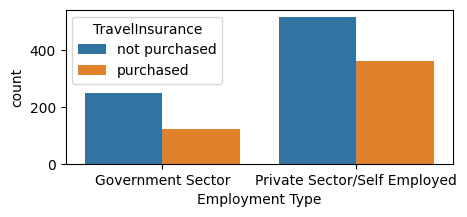

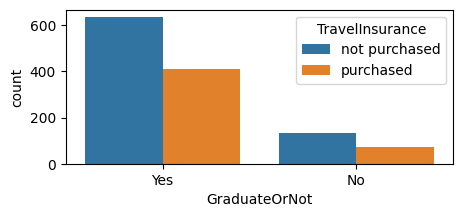

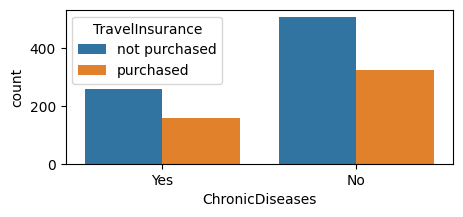

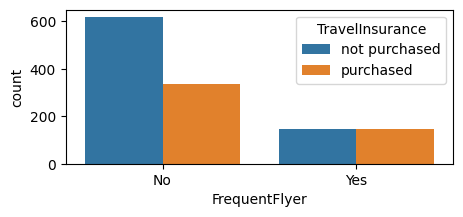

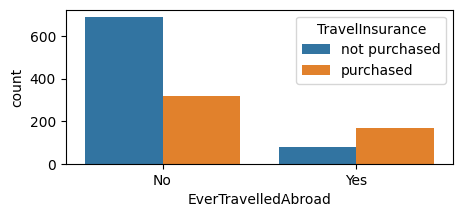

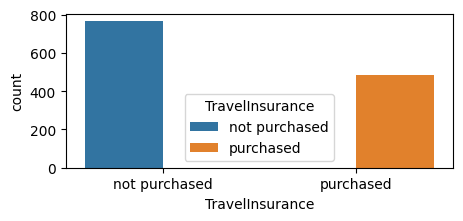

In [ ]:
target = 'TravelInsurance'
for feature in cats:
    fig, ax = plt.subplots(figsize=(5,2))
    sns.countplot(x=feature, hue=target, data=df, ax=ax)
    plt.show()

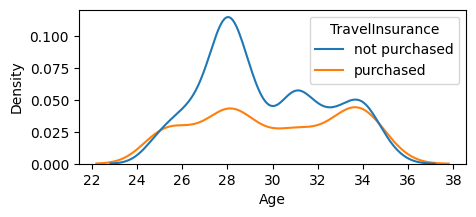

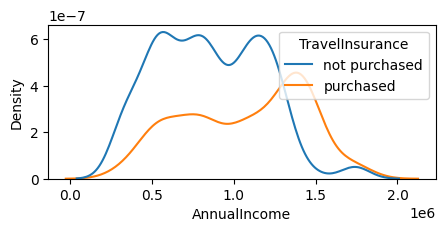

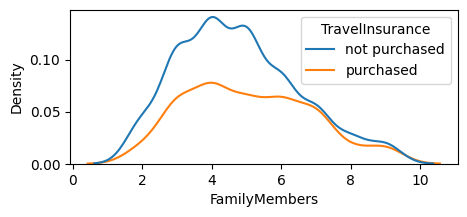

In [ ]:
for feature in nums:
  fig, ax = plt.subplots(figsize=(5,2))
  sns.kdeplot(data=df, hue=target, x=feature, ax=ax)
  plt.show()

## Bivariate

In [ ]:
# Drop feature target
#df=df.drop(['TravelInsurance'], axis=1)
#df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df
cats = []
nums = []
for i in df.columns:
  if df[i].dtype=='object':
    cats.append(i)
  else:
    nums.append(i)

In [ ]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,not purchased
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,not purchased
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,purchased
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,not purchased
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,not purchased
...,...,...,...,...,...,...,...,...,...
1976,32,Government Sector,Yes,900000,6,No,No,No,not purchased
1981,27,Government Sector,Yes,850000,3,No,No,No,purchased
1982,33,Private Sector/Self Employed,Yes,1500000,4,No,Yes,Yes,purchased
1983,28,Private Sector/Self Employed,Yes,1750000,5,Yes,No,Yes,not purchased


### Numerical with numerical

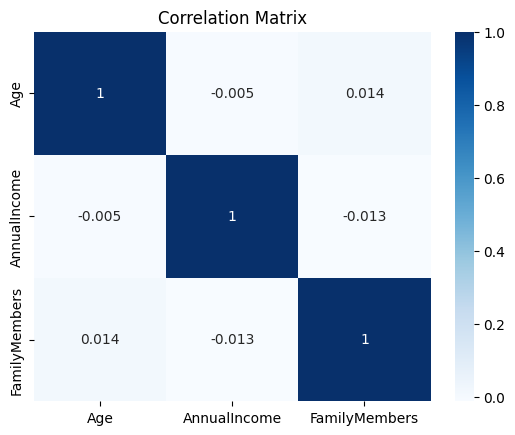

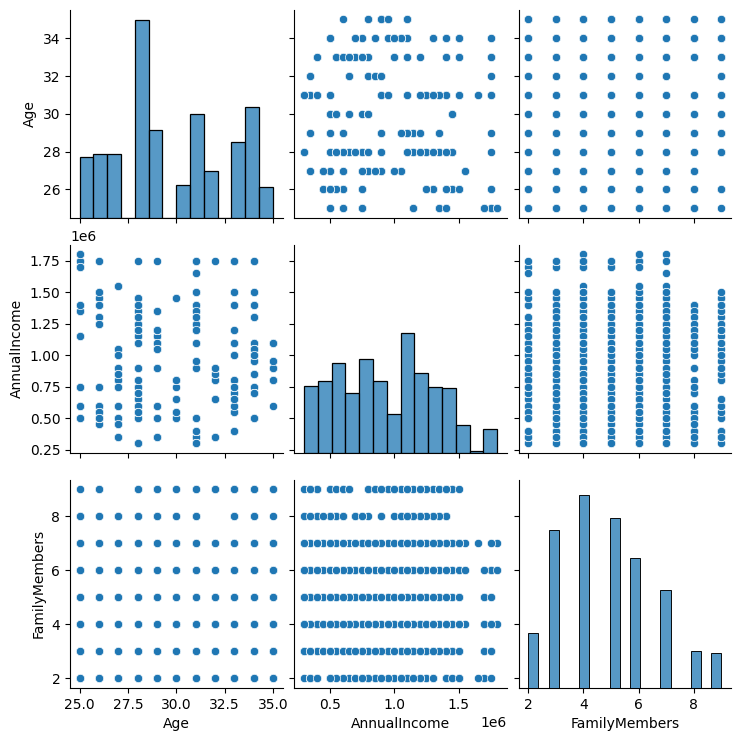

In [ ]:
# Bivariate analysis for numerical with numerical using correlation and scatter plot
corr = df[nums].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(df[nums])
plt.show()

### Categorical & Categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encoding menggunakan Label Encoding
le = LabelEncoder()
for cat in cats:
    df[cat] = le.fit_transform(df[cat])
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1976,32,0,1,900000,6,0,0,0,0
1981,27,0,1,850000,3,0,0,0,1
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0


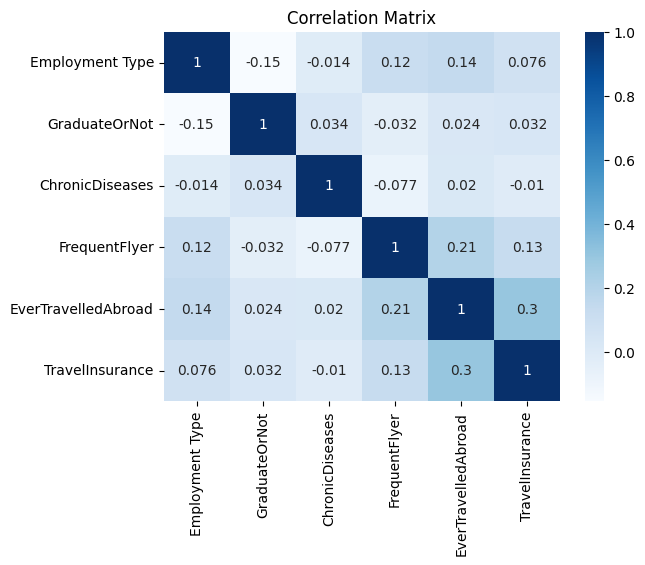

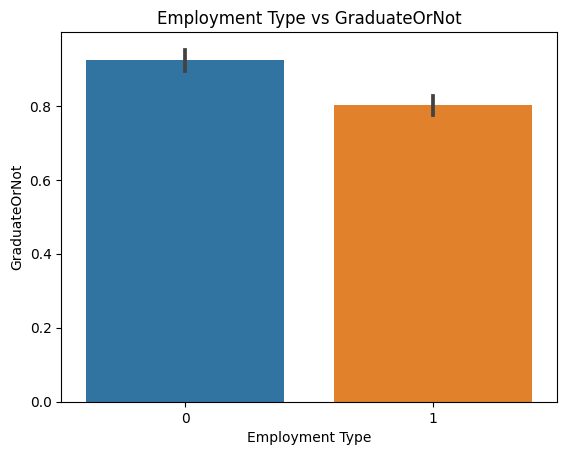

C-Square test result for Employment Type vs GraduateOrNot:
Chi-Square value = 28.5571
p-value = 0.0000
--------------------------------------


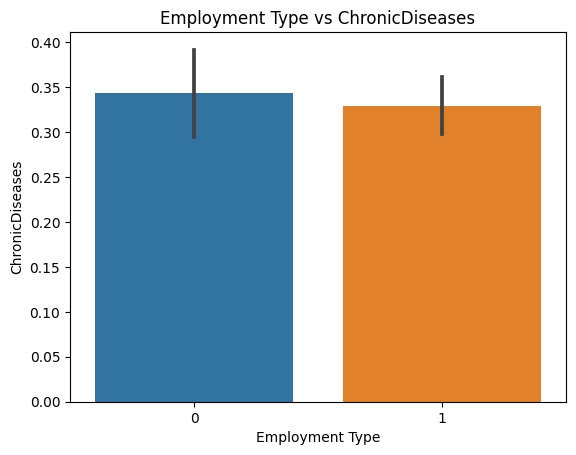

C-Square test result for Employment Type vs ChronicDiseases:
Chi-Square value = 0.1836
p-value = 0.6683
--------------------------------------


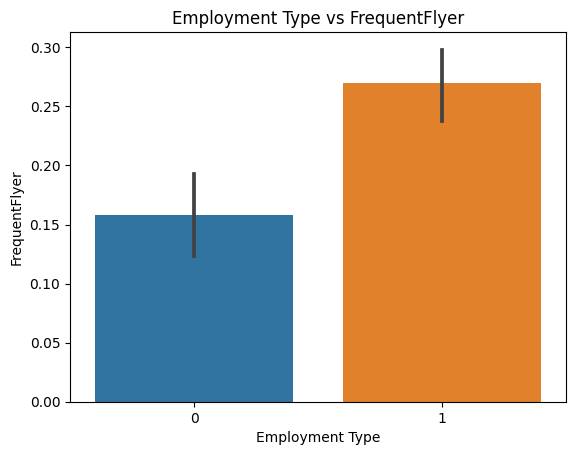

C-Square test result for Employment Type vs FrequentFlyer:
Chi-Square value = 17.3297
p-value = 0.0000
--------------------------------------


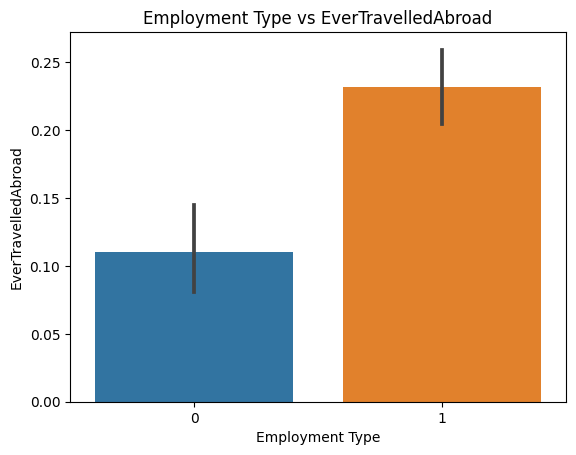

C-Square test result for Employment Type vs EverTravelledAbroad:
Chi-Square value = 23.9271
p-value = 0.0000
--------------------------------------


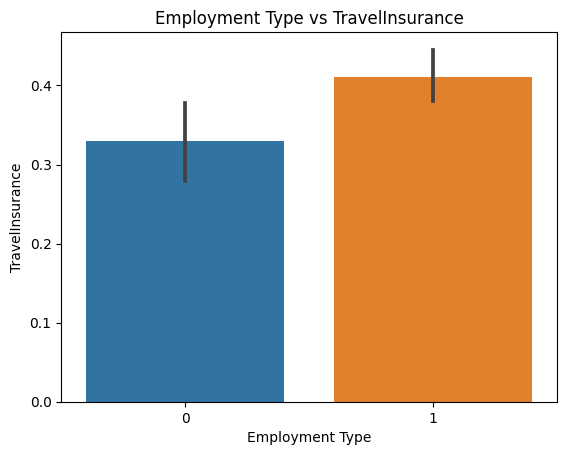

C-Square test result for Employment Type vs TravelInsurance:
Chi-Square value = 6.9347
p-value = 0.0085
--------------------------------------


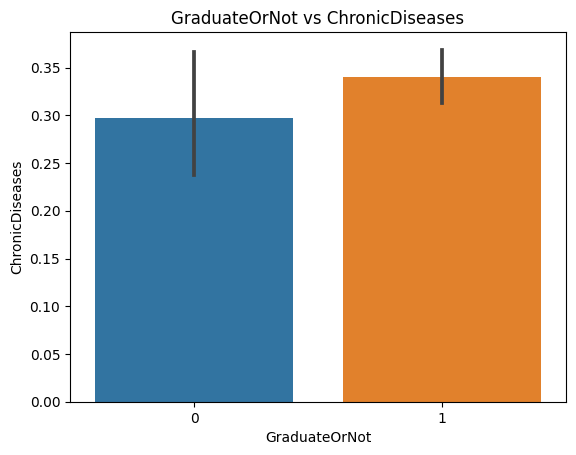

C-Square test result for GraduateOrNot vs ChronicDiseases:
Chi-Square value = 1.2219
p-value = 0.2690
--------------------------------------


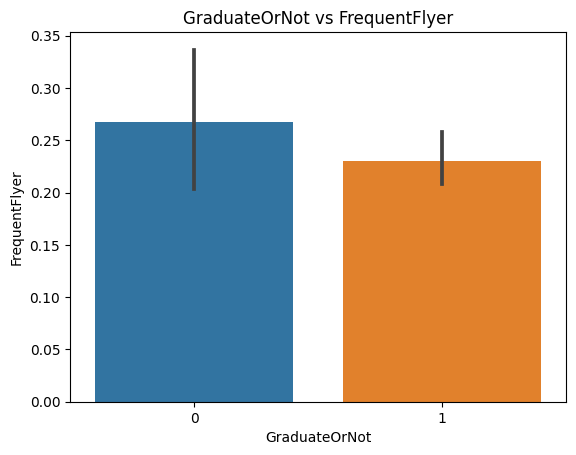

C-Square test result for GraduateOrNot vs FrequentFlyer:
Chi-Square value = 1.0974
p-value = 0.2948
--------------------------------------


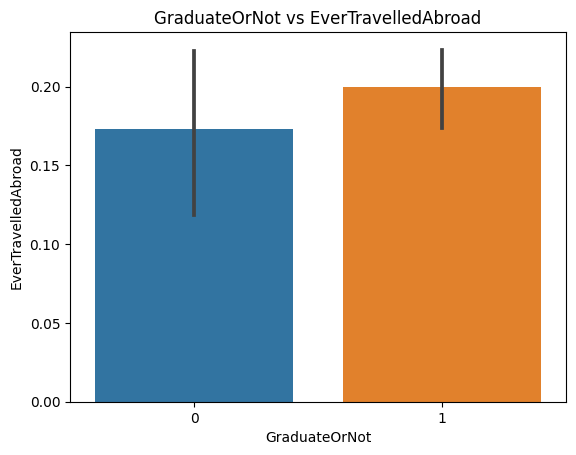

C-Square test result for GraduateOrNot vs EverTravelledAbroad:
Chi-Square value = 0.5897
p-value = 0.4425
--------------------------------------


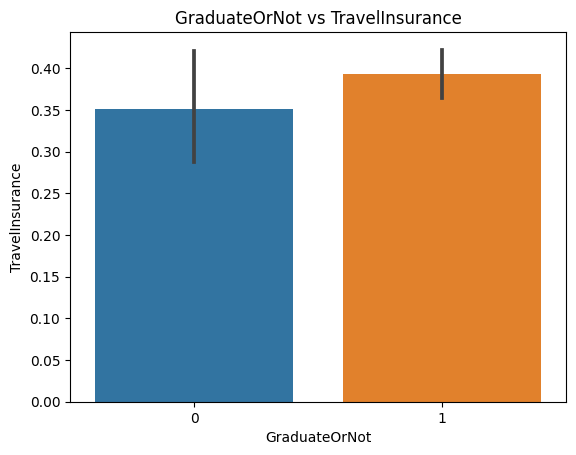

C-Square test result for GraduateOrNot vs TravelInsurance:
Chi-Square value = 1.0897
p-value = 0.2965
--------------------------------------


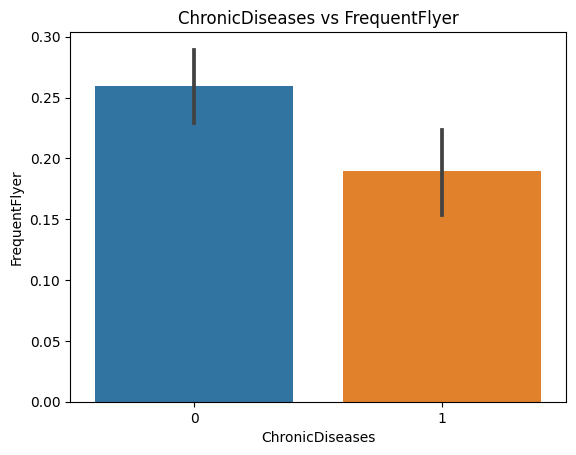

C-Square test result for ChronicDiseases vs FrequentFlyer:
Chi-Square value = 7.0274
p-value = 0.0080
--------------------------------------


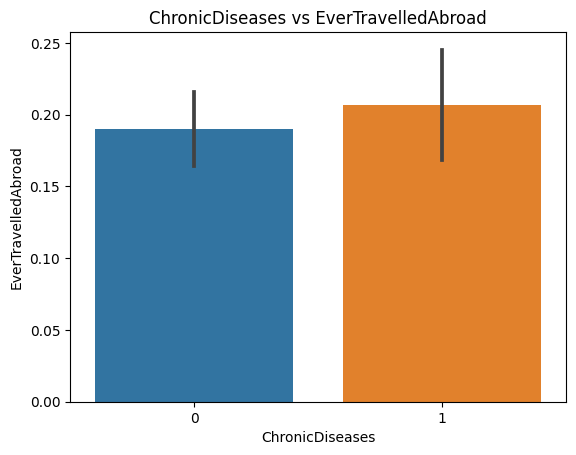

C-Square test result for ChronicDiseases vs EverTravelledAbroad:
Chi-Square value = 0.4106
p-value = 0.5217
--------------------------------------


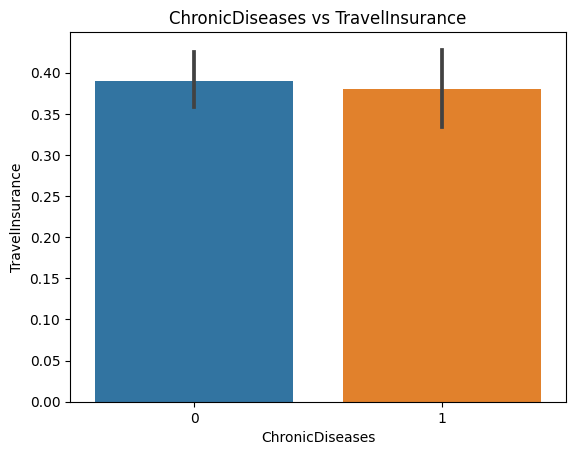

C-Square test result for ChronicDiseases vs TravelInsurance:
Chi-Square value = 0.0854
p-value = 0.7701
--------------------------------------


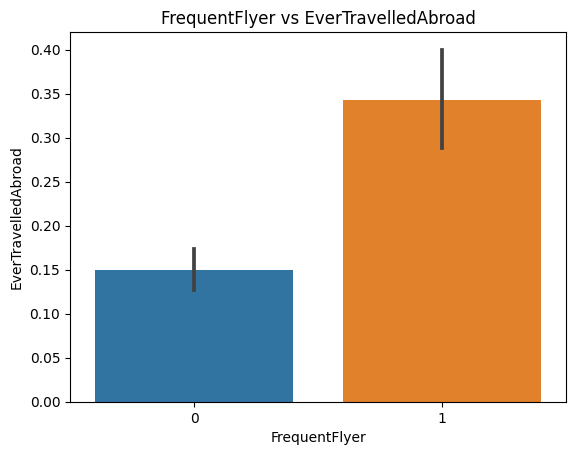

C-Square test result for FrequentFlyer vs EverTravelledAbroad:
Chi-Square value = 51.8879
p-value = 0.0000
--------------------------------------


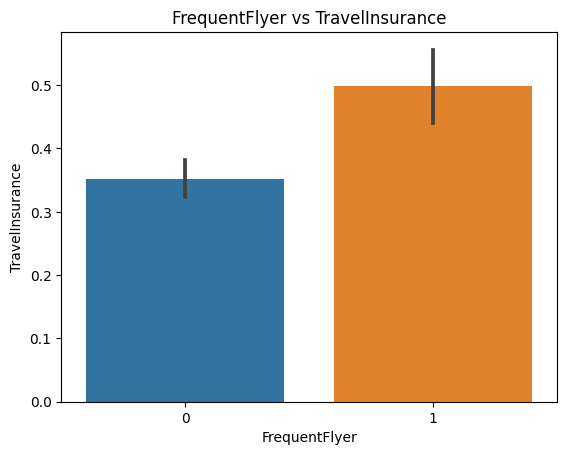

C-Square test result for FrequentFlyer vs TravelInsurance:
Chi-Square value = 19.6692
p-value = 0.0000
--------------------------------------


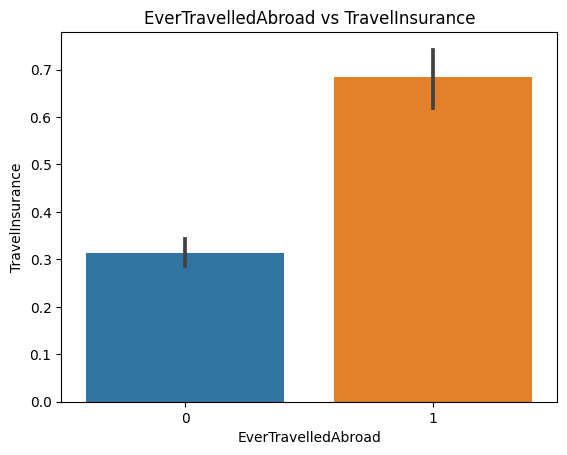

C-Square test result for EverTravelledAbroad vs TravelInsurance:
Chi-Square value = 111.7745
p-value = 0.0000
--------------------------------------


In [ ]:
corr = df[cats].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# Bivariate analysis for categorical with categorical using bar chart and C-Square test
for i in range(len(cats)):
    for j in range(i+1, len(cats)):
        crosstab = pd.crosstab(df[cats[i]], df[cats[j]])
        sns.barplot(x=cats[i], y=cats[j], data=df)
        plt.title(f'{cats[i]} vs {cats[j]}')
        plt.show()
        chi, p, dof, expected = chi2_contingency(crosstab)
        print(f'C-Square test result for {cats[i]} vs {cats[j]}:')
        print(f'Chi-Square value = {chi:.4f}')
        print(f'p-value = {p:.4f}')
        print('--------------------------------------')

### Numerical & Categorical

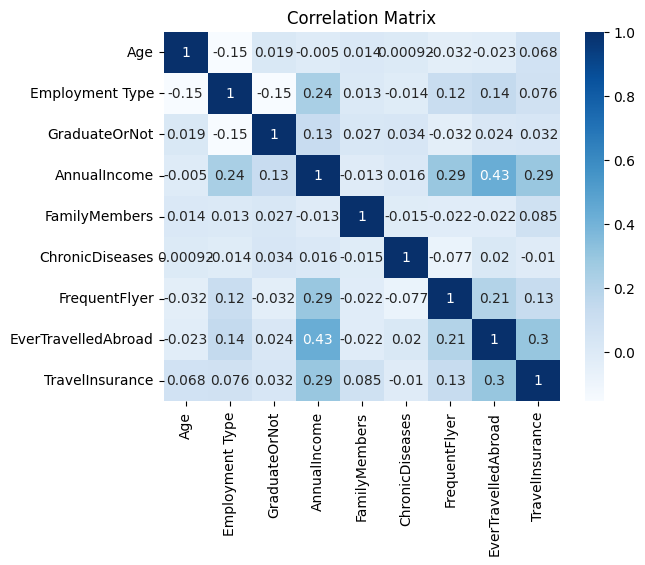

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

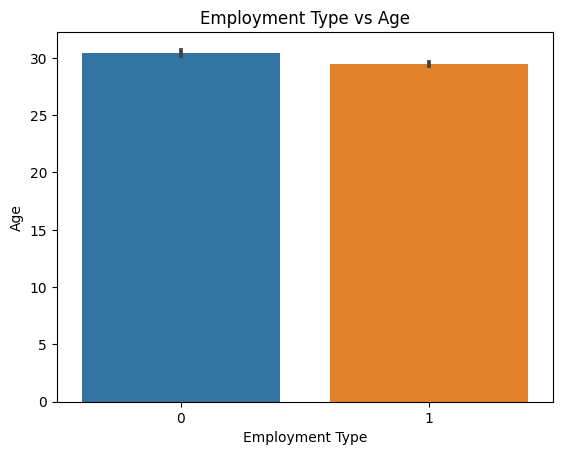

Z-Test result for Employment Type vs Age:
Z-Score value = 5.4392
p-value = 0.0000
--------------------------------------
T-Test result for Employment Type vs Age:
T-Statistic value = 5.4392
p-value = 0.0000
--------------------------------------
ANOVA result for Employment Type vs Age:
F-Statistic value = 29.5847
p-value = 0.0000
--------------------------------------


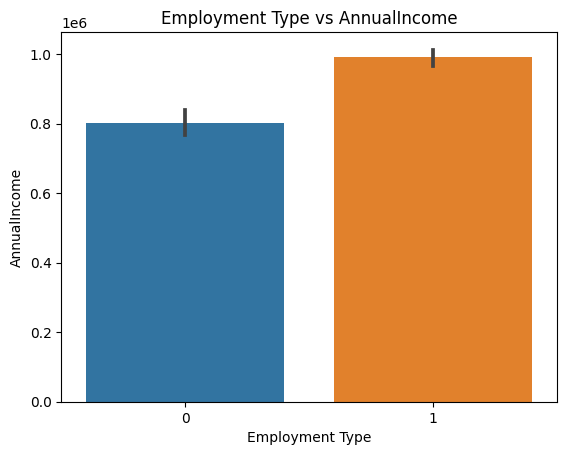

Z-Test result for Employment Type vs AnnualIncome:
Z-Score value = -8.6775
p-value = 0.0000
--------------------------------------
T-Test result for Employment Type vs AnnualIncome:
T-Statistic value = -8.6775
p-value = 0.0000
--------------------------------------
ANOVA result for Employment Type vs AnnualIncome:
F-Statistic value = 75.2991
p-value = 0.0000
--------------------------------------


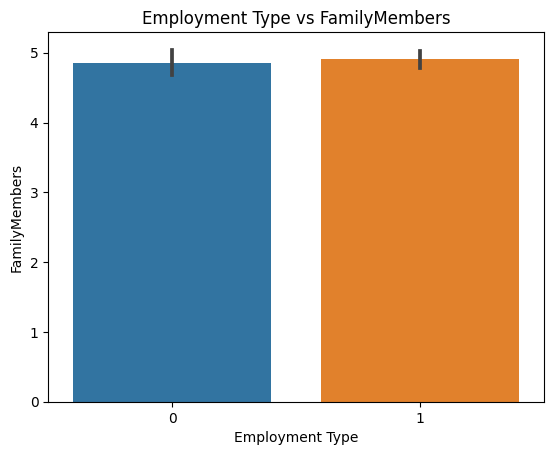

Z-Test result for Employment Type vs FamilyMembers:
Z-Score value = -0.4590
p-value = 0.6463
--------------------------------------
T-Test result for Employment Type vs FamilyMembers:
T-Statistic value = -0.4590
p-value = 0.6463
--------------------------------------
ANOVA result for Employment Type vs FamilyMembers:
F-Statistic value = 0.2106
p-value = 0.6463
--------------------------------------


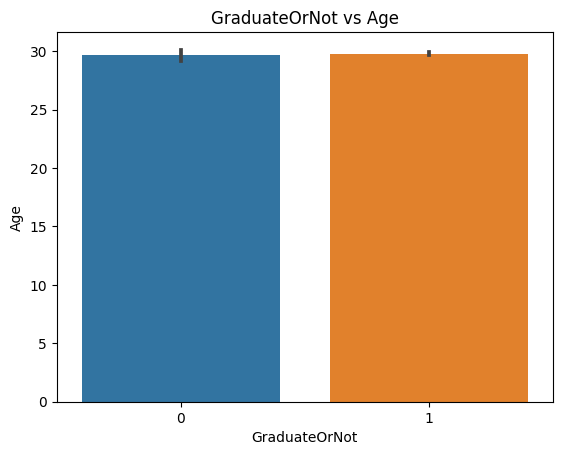

Z-Test result for GraduateOrNot vs Age:
Z-Score value = -0.6753
p-value = 0.4995
--------------------------------------
T-Test result for GraduateOrNot vs Age:
T-Statistic value = -0.6753
p-value = 0.4996
--------------------------------------
ANOVA result for GraduateOrNot vs Age:
F-Statistic value = 0.4560
p-value = 0.4996
--------------------------------------


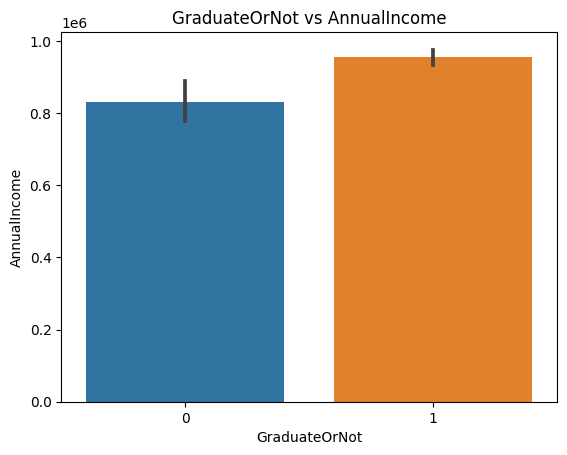

Z-Test result for GraduateOrNot vs AnnualIncome:
Z-Score value = -4.4599
p-value = 0.0000
--------------------------------------
T-Test result for GraduateOrNot vs AnnualIncome:
T-Statistic value = -4.4599
p-value = 0.0000
--------------------------------------
ANOVA result for GraduateOrNot vs AnnualIncome:
F-Statistic value = 19.8911
p-value = 0.0000
--------------------------------------


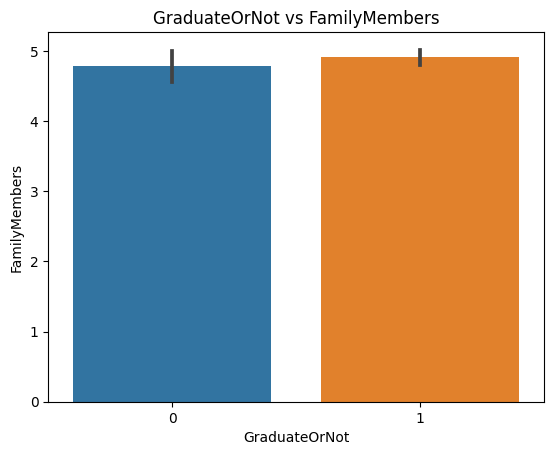

Z-Test result for GraduateOrNot vs FamilyMembers:
Z-Score value = -0.9525
p-value = 0.3409
--------------------------------------
T-Test result for GraduateOrNot vs FamilyMembers:
T-Statistic value = -0.9525
p-value = 0.3410
--------------------------------------
ANOVA result for GraduateOrNot vs FamilyMembers:
F-Statistic value = 0.9072
p-value = 0.3410
--------------------------------------


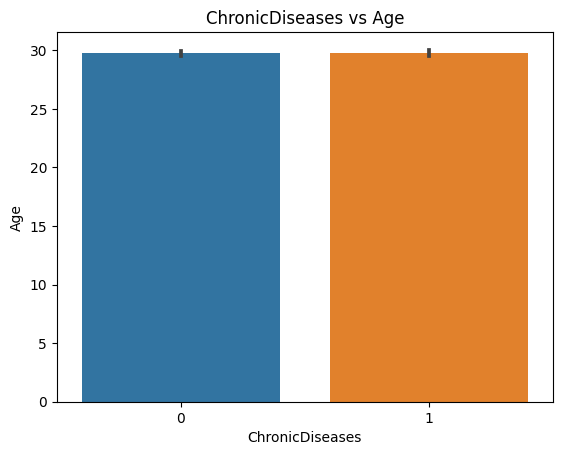

Z-Test result for ChronicDiseases vs Age:
Z-Score value = -0.0326
p-value = 0.9740
--------------------------------------
T-Test result for ChronicDiseases vs Age:
T-Statistic value = -0.0326
p-value = 0.9740
--------------------------------------
ANOVA result for ChronicDiseases vs Age:
F-Statistic value = 0.0011
p-value = 0.9740
--------------------------------------


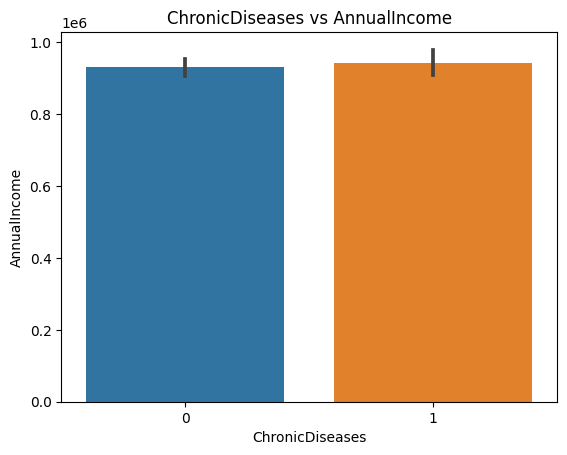

Z-Test result for ChronicDiseases vs AnnualIncome:
Z-Score value = -0.5787
p-value = 0.5628
--------------------------------------
T-Test result for ChronicDiseases vs AnnualIncome:
T-Statistic value = -0.5787
p-value = 0.5629
--------------------------------------
ANOVA result for ChronicDiseases vs AnnualIncome:
F-Statistic value = 0.3349
p-value = 0.5629
--------------------------------------


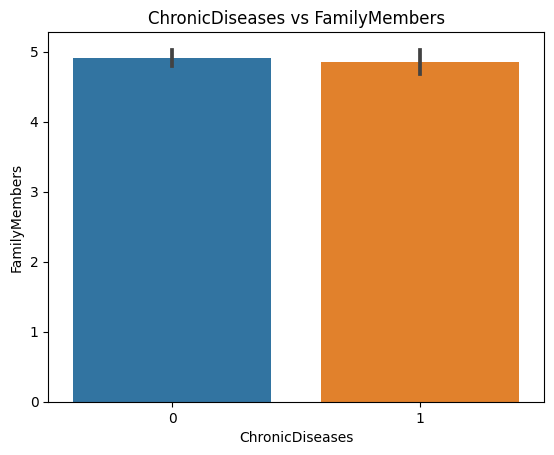

Z-Test result for ChronicDiseases vs FamilyMembers:
Z-Score value = 0.5234
p-value = 0.6007
--------------------------------------
T-Test result for ChronicDiseases vs FamilyMembers:
T-Statistic value = 0.5234
p-value = 0.6008
--------------------------------------
ANOVA result for ChronicDiseases vs FamilyMembers:
F-Statistic value = 0.2740
p-value = 0.6008
--------------------------------------


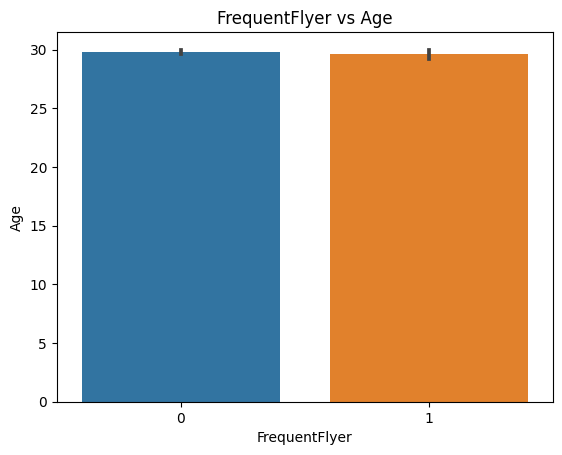

Z-Test result for FrequentFlyer vs Age:
Z-Score value = 1.1396
p-value = 0.2545
--------------------------------------
T-Test result for FrequentFlyer vs Age:
T-Statistic value = 1.1396
p-value = 0.2547
--------------------------------------
ANOVA result for FrequentFlyer vs Age:
F-Statistic value = 1.2987
p-value = 0.2547
--------------------------------------


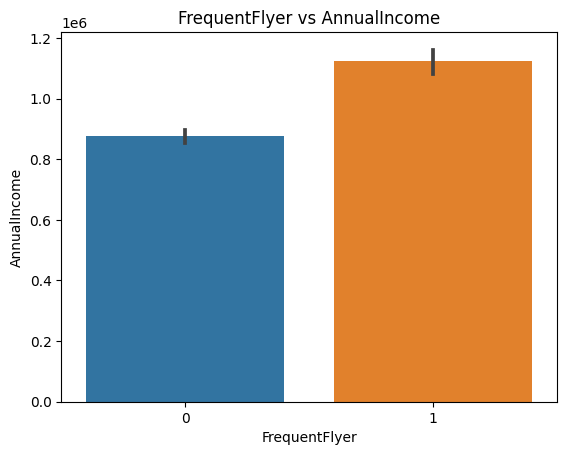

Z-Test result for FrequentFlyer vs AnnualIncome:
Z-Score value = -10.8133
p-value = 0.0000
--------------------------------------
T-Test result for FrequentFlyer vs AnnualIncome:
T-Statistic value = -10.8133
p-value = 0.0000
--------------------------------------
ANOVA result for FrequentFlyer vs AnnualIncome:
F-Statistic value = 116.9264
p-value = 0.0000
--------------------------------------


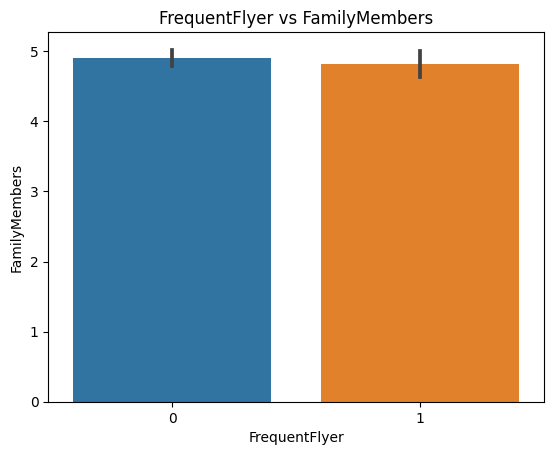

Z-Test result for FrequentFlyer vs FamilyMembers:
Z-Score value = 0.7802
p-value = 0.4353
--------------------------------------
T-Test result for FrequentFlyer vs FamilyMembers:
T-Statistic value = 0.7802
p-value = 0.4354
--------------------------------------
ANOVA result for FrequentFlyer vs FamilyMembers:
F-Statistic value = 0.6087
p-value = 0.4354
--------------------------------------


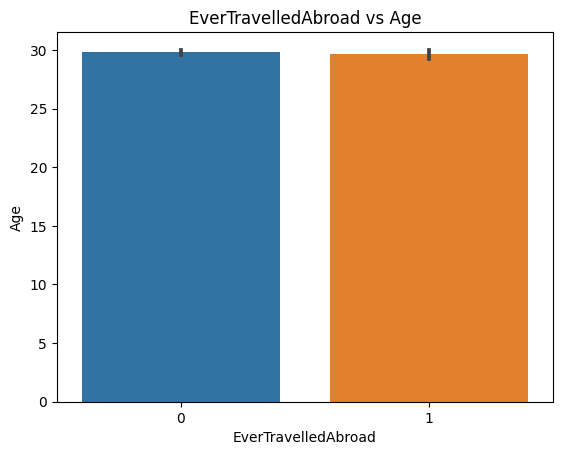

Z-Test result for EverTravelledAbroad vs Age:
Z-Score value = 0.8163
p-value = 0.4143
--------------------------------------
T-Test result for EverTravelledAbroad vs Age:
T-Statistic value = 0.8163
p-value = 0.4145
--------------------------------------
ANOVA result for EverTravelledAbroad vs Age:
F-Statistic value = 0.6664
p-value = 0.4145
--------------------------------------


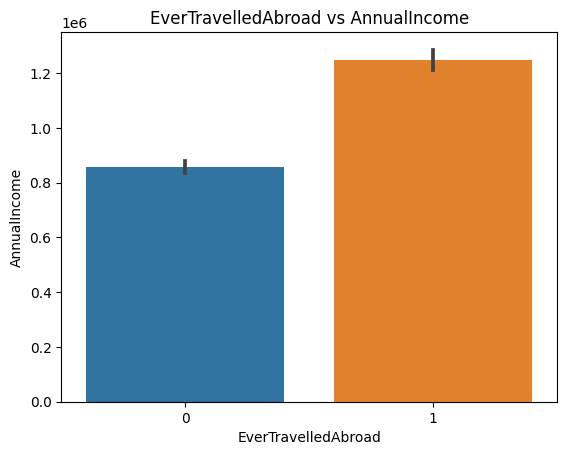

Z-Test result for EverTravelledAbroad vs AnnualIncome:
Z-Score value = -16.8160
p-value = 0.0000
--------------------------------------
T-Test result for EverTravelledAbroad vs AnnualIncome:
T-Statistic value = -16.8160
p-value = 0.0000
--------------------------------------
ANOVA result for EverTravelledAbroad vs AnnualIncome:
F-Statistic value = 282.7774
p-value = 0.0000
--------------------------------------


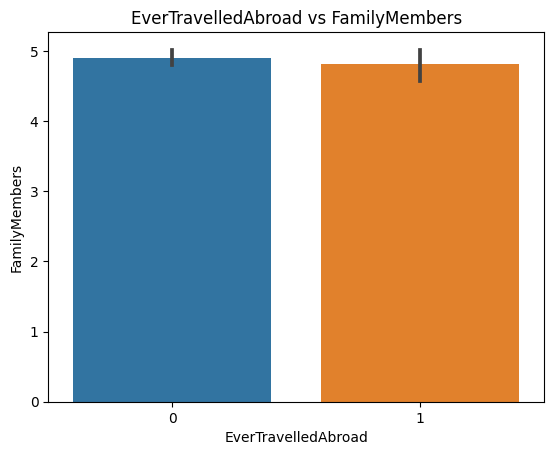

Z-Test result for EverTravelledAbroad vs FamilyMembers:
Z-Score value = 0.7789
p-value = 0.4361
--------------------------------------
T-Test result for EverTravelledAbroad vs FamilyMembers:
T-Statistic value = 0.7789
p-value = 0.4362
--------------------------------------
ANOVA result for EverTravelledAbroad vs FamilyMembers:
F-Statistic value = 0.6067
p-value = 0.4362
--------------------------------------


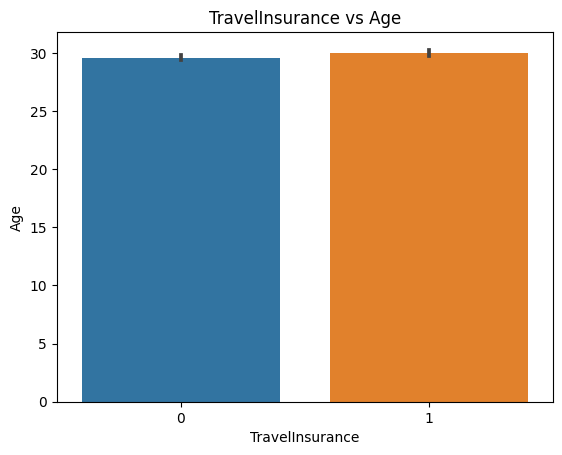

Z-Test result for TravelInsurance vs Age:
Z-Score value = -2.3904
p-value = 0.0168
--------------------------------------
T-Test result for TravelInsurance vs Age:
T-Statistic value = -2.3904
p-value = 0.0170
--------------------------------------
ANOVA result for TravelInsurance vs Age:
F-Statistic value = 5.7138
p-value = 0.0170
--------------------------------------


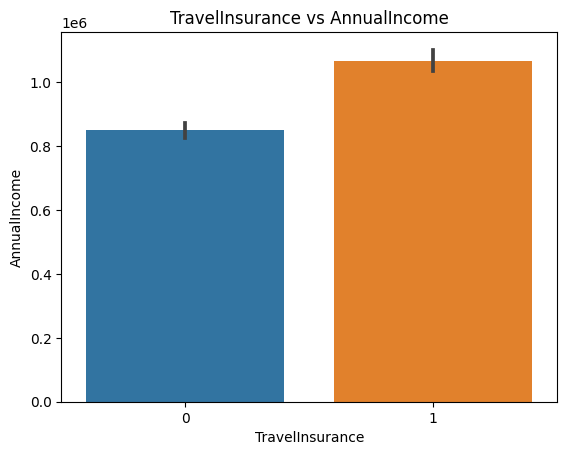

Z-Test result for TravelInsurance vs AnnualIncome:
Z-Score value = -10.8585
p-value = 0.0000
--------------------------------------
T-Test result for TravelInsurance vs AnnualIncome:
T-Statistic value = -10.8585
p-value = 0.0000
--------------------------------------
ANOVA result for TravelInsurance vs AnnualIncome:
F-Statistic value = 117.9071
p-value = 0.0000
--------------------------------------


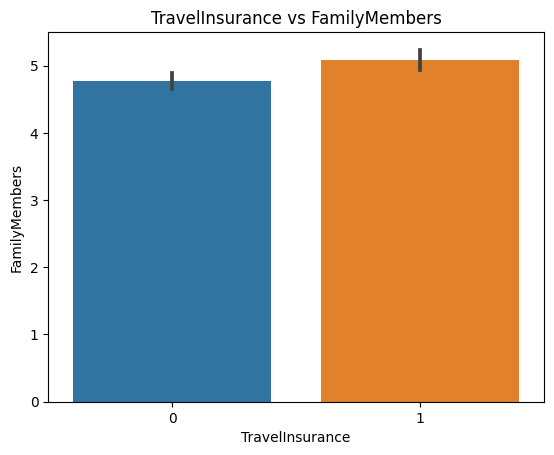

Z-Test result for TravelInsurance vs FamilyMembers:
Z-Score value = -3.0092
p-value = 0.0026
--------------------------------------
T-Test result for TravelInsurance vs FamilyMembers:
T-Statistic value = -3.0092
p-value = 0.0027
--------------------------------------
ANOVA result for TravelInsurance vs FamilyMembers:
F-Statistic value = 9.0552
p-value = 0.0027
--------------------------------------


In [ ]:
# Bivariate analysis for categorical with numerical using Z-test, T-test, ANOVA, Bar and Line Chart

for cat in cats:
    for num in nums:
        sns.barplot(x=cat, y=num, data=df)
        plt.title(f'{cat} vs {num}')
        plt.show()
        groups = df.groupby(cat)[num].apply(list)
        z_score, p_value = sm.stats.ztest(groups[0], groups[1])
        print(f'Z-Test result for {cat} vs {num}:')
        print(f'Z-Score value = {z_score:.4f}')
        print(f'p-value = {p_value:.4f}')
        print('--------------------------------------')
        t_statistic, p_value = ttest_ind(groups[0], groups[1])
        print(f'T-Test result for {cat} vs {num}:')
        print(f'T-Statistic value = {t_statistic:.4f}')
        print(f'p-value = {p_value:.4f}')
        print('--------------------------------------')
        f_statistic, p_value = f_oneway(groups[0], groups[1])
        print(f'ANOVA result for {cat} vs {num}:')
        print(f'F-Statistic value = {f_statistic:.4f}')
        print(f'p-value = {p_value:.4f}')
        print('--------------------------------------')

# Data Prepration

## Load Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/TravelInsurancePrediction.csv')
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### Drop Unnamed

In [ ]:
df=df.drop(['Unnamed: 0'], axis=1)
df.duplicated().sum()

738

In [ ]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1976,32,Government Sector,Yes,900000,6,0,No,No,0
1981,27,Government Sector,Yes,850000,3,0,No,No,1
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0


## Handling Outlier

Berdasarkan EDA tidak ditemukan Outlier

## Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
   encoder = LabelEncoder()
   df[col] = encoder.fit_transform(df[col])

In [ ]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1976,32,0,1,900000,6,0,0,0,0
1981,27,0,1,850000,3,0,0,0,1
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0


## Split Data

In [ ]:
# memisahkan feature dan target variable
X = df.drop('TravelInsurance', axis = 1)
y = df['TravelInsurance']
#Splitting the data into Train and Test
print(df.info())
print(df.duplicated().sum())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1985
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1249 non-null   int64
 1   Employment Type      1249 non-null   int64
 2   GraduateOrNot        1249 non-null   int64
 3   AnnualIncome         1249 non-null   int64
 4   FamilyMembers        1249 non-null   int64
 5   ChronicDiseases      1249 non-null   int64
 6   FrequentFlyer        1249 non-null   int64
 7   EverTravelledAbroad  1249 non-null   int64
 8   TravelInsurance      1249 non-null   int64
dtypes: int64(9)
memory usage: 97.6 KB
None
0


#Classification

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    # 
    score = cross_validate(GradientBoostingClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def grafik_roc_auc(model):
    # predict probabilities of positive class for training and testing data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # calculate ROC AUC score for training and testing data
    train_auc = roc_auc_score(y_train, y_train_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)

    # calculate false positive rate and true positive rate for training and testing data
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

    # create dataframe to store ROC data
    roc_data = pd.DataFrame({
    'FPR (Train)': train_fpr,
    'TPR (Train)': train_tpr,
    'FPR (Test)': test_fpr,
    'TPR (Test)': test_tpr
    })

    # plot ROC curves for training and testing data
    plt.plot(train_fpr, train_tpr, label=f'Train ROC curve (AUC = {train_auc:.2f})')
    plt.plot(test_fpr, test_tpr, label=f'Test ROC curve (AUC = {test_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

## AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator='deprecated',
                                                 estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=25,
                                                 random_state=42)
                            
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
eval_classification(ada)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.89
Recall (Test Set): 0.49
F1-Score (Test Set): 0.63
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.75
roc_auc (crossval train): 0.8583852531252288
roc_auc (crossval test): 0.7363021079904419


## QuadraticDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
eval_classification(qda)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.72
Recall (Test Set): 0.48
F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.73
roc_auc (crossval train): 0.8583852531252288
roc_auc (crossval test): 0.7362886318095916


## naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
eval_classification(nb)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.71
Recall (Test Set): 0.42
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.69
roc_auc (train-proba): 0.67
roc_auc (crossval train): 0.8583852531252288
roc_auc (crossval test): 0.7362748748749735


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
eval_classification(rf)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.56
Recall (Test Set): 0.51
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.65
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.8583852531252288
roc_auc (crossval test): 0.7362750152518573


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
eval_classification(lr)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.31
roc_auc (train-proba): 0.33
roc_auc (crossval train): 0.8583852531252288
roc_auc (crossval test): 0.7363021079904419


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
eval_classification(dt)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.50
Recall (Test Set): 0.53
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.60
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.8583852531252288
roc_auc (crossval test): 0.7362750152518573


## SVM

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

Accuracy on training set: 0.388
Accuracy on test set: 0.384


## GradientBoostingClassifier



---


### Gradient Boosting Classifier 
adalah algoritma pembelajaran mesin yang digunakan 
untuk melakukan klasifikasi data pada tugas-tugas supervised learning. Algoritma ini bekerja dengan menggabungkan beberapa model pembelajaran mesin sederhana **(weak learner)** yang disebut **decision tree**, sehingga membentuk model pembelajaran mesin yang lebih kuat **(strong learner)**

Cara kerja Gradient Boosting Classifier adalah dengan membuat model decision tree pada setiap iterasi, dan kemudian mengkombinasikan hasil prediksi dari masing-masing model decision tree tersebut dengan cara menambahkan nilai bobot pada setiap hasil prediksi. Bobot ini menunjukkan seberapa pentingnya hasil prediksi tersebut dalam menyelesaikan tugas klasifikasi secara keseluruhan.


---

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
eval_classification(gbc)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.87
Recall (Test Set): 0.50
F1-Score (Test Set): 0.63
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.85
roc_auc (crossval train): 0.8583852531252288
roc_auc (crossval test): 0.7362886318095916


### GradientBoostingClassifier Final Model

Berdasarkan hasil dari **Hyperparameters Tuning**, paramater yang didapat dimasukan kedalam model yang dibuat untuk memaksimalkan hasil dari algoritma yang dipakai

In [ ]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=1.7, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=6, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
eval_classification(gbc)
#grafik_roc_auc(gbc)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.91
Recall (Test Set): 0.52
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.72
roc_auc (crossval train): 0.8583852531252288
roc_auc (crossval test): 0.7363021079904419


Berdasarkan hasil dari evaluasi data roc_auc, data yang dimiliki tidak memiliki kecenderungan overfitting atau underfitting. hal tersebut dapat divalidasi pada nilai cross validation.

### Hyperparameters Tuning Classifier

Untuk mengetahui nilai nilai parameter yang paling baik digunakan untuk algoritma sehingga memiliki model yang maksimal

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[1,6,12],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train,y_train.values.ravel())

def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

Best parameters are: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 6}


0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 1}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 6}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 12}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 6}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 12}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 6}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 12}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1}
0.612 + or -0.001 for the {'learning_rate': 0.01, 'max_depth': 7, 

### Learning Curve

Untuk mengecek batas nilai dari parameter yang digunakan untuk melakukan **Hyperparameters Tuning**

param value: 1; train: 0.7378490888539684; test: 0.7470238095238095
param value: 2; train: 0.7378490888539684; test: 0.7470238095238095
param value: 4; train: 0.7388470763377719; test: 0.740755772005772
param value: 5; train: 0.7455986546467068; test: 0.740755772005772
param value: 7; train: 0.7622529153916137; test: 0.7538329725829727
param value: 8; train: 0.7613652027678991; test: 0.7529912217412218
param value: 10; train: 0.7827695531111294; test: 0.7516083453583454
param value: 11; train: 0.7828688004852093; test: 0.7538930976430976
param value: 13; train: 0.7885396851652744; test: 0.7513979076479076
param value: 15; train: 0.7886582306398698; test: 0.7487073112073113


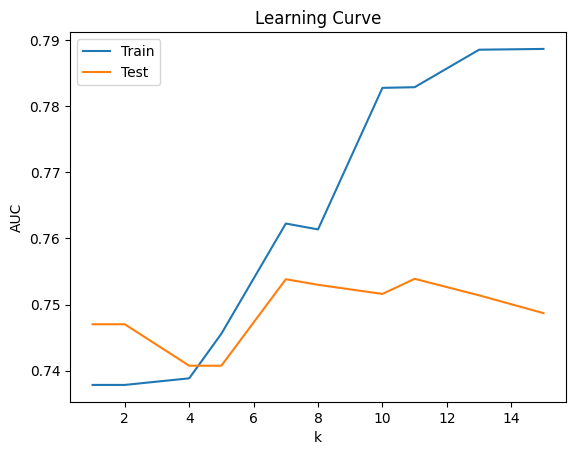

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = GradientBoostingClassifier(n_estimators=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 15, 10)]
draw_learning_curve(param_values)

## Feature Importance

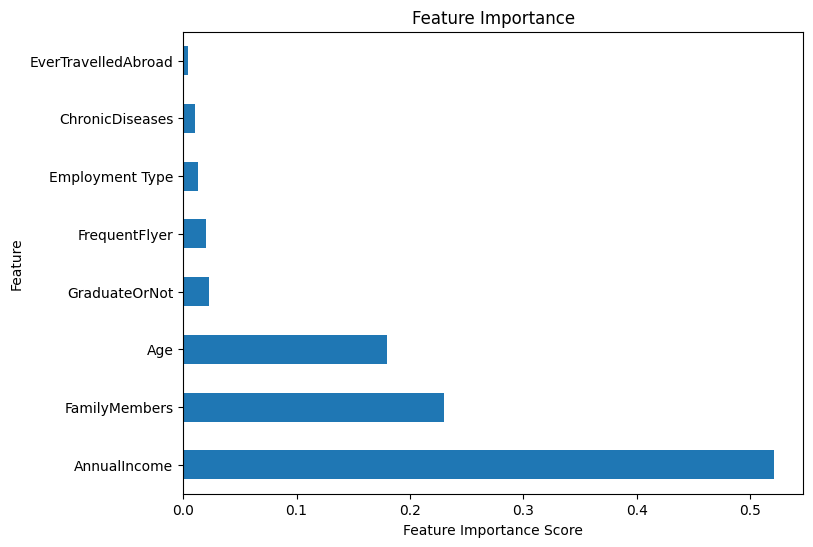

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(25).plot(kind='barh', figsize=(8,6))
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance')

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
show_feature_importance(gbc)

## Explainable AI: Shap Value

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
!pip install Shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


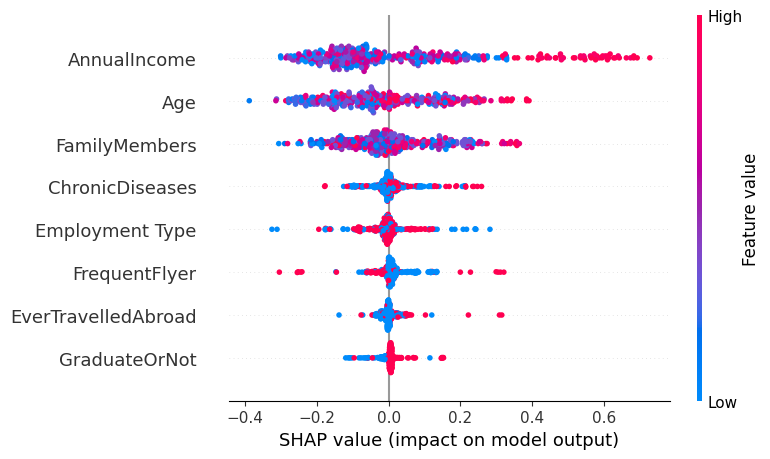

In [ ]:
import shap
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])

## Simulasi

In [ ]:
df = pd.read_csv('/content/sample_data/TravelInsurancePrediction.csv')

In [ ]:
Simulation = df

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
   encoder = LabelEncoder()
   df[col] = encoder.fit_transform(df[col])
   
Simulation

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,1,1,1500000,4,0,1,1,1
1983,1983,28,1,1,1750000,5,1,0,1,0
1984,1984,28,1,1,1150000,6,1,0,0,0
1985,1985,34,1,1,1000000,6,0,1,1,1


In [ ]:
np.random.seed(42)
Simulation['AnnualIncome'] = np.random.randint(1400000, 1800000, size=len(Simulation))

In [ ]:
Simulation = Simulation.drop(['TravelInsurance','Unnamed: 0'], axis=1)
Simulation.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.713135,0.851535,1.598587e+06,4.752894,0.277806,0.209864,0.191243
std,2.913308,0.452412,0.355650,1.161160e+05,1.609650,0.448030,0.407314,0.393379
min,25.000000,0.000000,0.000000,1.400126e+06,2.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,1.500196e+06,4.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,1.593752e+06,5.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.700453e+06,6.000000,1.000000,0.000000,0.000000
max,35.000000,1.000000,1.000000,1.799953e+06,9.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                                 learning_rate=0.1, loss='log_loss', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=1.7, min_samples_leaf=1,
                                 min_samples_split=2, min_weight_fraction_leaf=0.0,
                                 n_estimators=6, n_iter_no_change=None,
                                 random_state=42, subsample=1.0, tol=0.0001,
                                 validation_fraction=0.1, verbose=0,
                                 warm_start=False)

gbc.fit(X_train, y_train)
Simulation['predicted_class'] = gbc.predict(Simulation)

In [ ]:
Simulation

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,predicted_class
0,31,0,1,1521958,6,1,0,0,1
1,31,1,1,1546867,7,0,0,0,1
2,34,1,1,1531932,4,1,0,0,1
3,28,1,1,1765838,3,1,0,0,0
4,28,1,1,1659178,8,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1422431,4,0,1,1,1
1983,28,1,1,1723825,5,1,0,1,0
1984,28,1,1,1594555,6,1,0,0,1
1985,34,1,1,1522720,6,0,1,1,1


In [ ]:
import plotly.express as px

df["ChronicDiseases"]= df["ChronicDiseases"].map({0: "No", 1: "Yes"})
df["TravelInsurance"]= df["TravelInsurance"].map({0: "not purchased", 1: "purchased"})

px.pie(df, 
       names='TravelInsurance', 
       color='TravelInsurance', 
       title='Berapa banyak customer yang membeli travel insurance?',
      )

In [ ]:
Simulation["predicted_class"]= Simulation["predicted_class"].map({0: "not purchased", 1: "purchased"})

In [ ]:
count = Simulation.groupby('predicted_class').size().reset_index(name='total')

In [ ]:
count

,predicted_class,total
0,not purchased,562
1,purchased,1425


In [ ]:
import plotly.express as px

colors = ['green', 'cyan']
px.pie(Simulation, 
             names='predicted_class', 
             color='predicted_class', 
             color_discrete_sequence=colors,
             title='Estimated many customers take insurance')